<a href="https://colab.research.google.com/github/grahamswanston/cap-comp215/blob/main/graham_final_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP215 Mid-term Exam   Spring 2022
* Student Name: Graham Swanston
* Date: April 7


## Instructions:
 - exam is open-book, open-internet, but must be completed individually (no communications, cooperations, or assistance)
 - complete the exercises in this notebook
 - for each exercise, write a piece of code that solves the problem and produces some output, as specified.

### Topics:
 - Data structures:  list, dictionary, class, graph, 1D and 2D array
 - Algorithms: graph traversal, matrix operators (numpy), sliding dot-product (correlation)
 - Techniques: list comprehension, generators, random numbers, plotting
 - Concepts: Big-O

As usual, we start with module imports...

In [1]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.signal import correlate2d

if not os.path.exists('utils.py'):
  !wget  https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/utils.py
if not os.path.exists('Cell2D.py'):
  !wget  https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/Cell2D.py
from Cell2D import Cell2D, draw_array

--2022-04-08 20:16:07--  https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2645 (2.6K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   2.58K  --.-KB/s    in 0s      

2022-04-08 20:16:08 (45.6 MB/s) - ‘utils.py’ saved [2645/2645]

--2022-04-08 20:16:08--  https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/Cell2D.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2628 (2.6K) [text/plain]
Saving 

## Structured Data
The `exoplanets` data below was fetched from [NASA's Exoplanet Archive API](https://exoplanetarchive.ipac.caltech.edu/docs/API_queries.html) (only portion of data is shown here).
[https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,disc_year,disc_telescope+from+pscomppars&format=json]

It is a list of confirmed exoplanets, where each record provides the planet name `pl_name` and host star `hostname`, along with discovery year and telescope.

In [2]:
exoplanets = [
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1901',
  'pl_name': 'Kepler-1901 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1882',
  'pl_name': 'Kepler-1882 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1732',
  'pl_name': 'Kepler-1732 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-152',
  'pl_name': 'Kepler-152 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1526',
  'pl_name': 'Kepler-1526 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1475',
  'pl_name': 'Kepler-1475 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1863',
  'pl_name': 'Kepler-1863 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-954',
  'pl_name': 'Kepler-954 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-533',
  'pl_name': 'Kepler-533 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1559',
  'pl_name': 'Kepler-1559 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2019,
  'hostname': 'V1298 Tau',
  'pl_name': 'V1298 Tau d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-34',
  'pl_name': 'K2-34 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-122',
  'pl_name': 'Kepler-122 f'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-413',
  'pl_name': 'Kepler-413 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-154',
  'pl_name': 'K2-154 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-885',
  'pl_name': 'Kepler-885 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-120',
  'pl_name': 'Kepler-120 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1878',
  'pl_name': 'Kepler-1878 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-324',
  'pl_name': 'Kepler-324 e'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'KIC 5437945',
  'pl_name': 'Kepler-460 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-473',
  'pl_name': 'Kepler-473 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-85',
  'pl_name': 'Kepler-85 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-32',
  'pl_name': 'Kepler-32 e'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2012,
  'hostname': 'GJ 3470',
  'pl_name': 'GJ 3470 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2013,
  'hostname': 'Kepler-66',
  'pl_name': 'Kepler-66 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-971',
  'pl_name': 'Kepler-971 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1432',
  'pl_name': 'Kepler-1432 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-953',
  'pl_name': 'Kepler-953 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2008,
  'hostname': 'HD 20868',
  'pl_name': 'HD 20868 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1365',
  'pl_name': 'Kepler-1365 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-903',
  'pl_name': 'Kepler-903 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-347',
  'pl_name': 'K2-347 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2015,
  'hostname': 'Kepler-439',
  'pl_name': 'Kepler-439 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-810',
  'pl_name': 'Kepler-810 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-334',
  'pl_name': 'K2-334 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-2184',
  'pl_name': 'TOI-2184 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-600',
  'pl_name': 'Kepler-600 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1161',
  'pl_name': 'Kepler-1161 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-543',
  'pl_name': 'Kepler-543 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1494',
  'pl_name': 'Kepler-1494 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1221',
  'pl_name': 'Kepler-1221 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-856',
  'pl_name': 'Kepler-856 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1340',
  'pl_name': 'Kepler-1340 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-266',
  'pl_name': 'K2-266 e'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1473',
  'pl_name': 'Kepler-1473 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2009,
  'hostname': 'HD 125595',
  'pl_name': 'HD 125595 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-173',
  'pl_name': 'Kepler-173 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-1759',
  'pl_name': 'TOI-1759 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1853',
  'pl_name': 'Kepler-1853 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1083',
  'pl_name': 'Kepler-1083 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2022,
  'hostname': 'K2-384',
  'pl_name': 'K2-384 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-46',
  'pl_name': 'K2-46 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2019,
  'hostname': 'TOI-125',
  'pl_name': 'TOI-125 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-262',
  'pl_name': 'Kepler-262 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1493',
  'pl_name': 'Kepler-1493 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2022,
  'hostname': 'K2-383',
  'pl_name': 'K2-383 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1156',
  'pl_name': 'Kepler-1156 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1593',
  'pl_name': 'Kepler-1593 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-769',
  'pl_name': 'Kepler-769 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-180',
  'pl_name': 'K2-180 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1001',
  'pl_name': 'Kepler-1001 b'},
 {'disc_telescope': '1.6 m wide-field telescope',
  'disc_year': 2019,
  'hostname': 'KMT-2017-BLG-1146L',
  'pl_name': 'KMT-2017-BLG-1146L b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-59',
  'pl_name': 'Kepler-59 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1339',
  'pl_name': 'Kepler-1339 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-116',
  'pl_name': 'Kepler-116 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1735',
  'pl_name': 'Kepler-1735 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1919',
  'pl_name': 'Kepler-1919 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-199',
  'pl_name': 'K2-199 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-30',
  'pl_name': 'Kepler-30 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1058',
  'pl_name': 'Kepler-1058 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-342',
  'pl_name': 'Kepler-342 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-178',
  'pl_name': 'Kepler-178 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-300',
  'pl_name': 'Kepler-300 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-49',
  'pl_name': 'Kepler-49 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-285',
  'pl_name': 'Kepler-285 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1388',
  'pl_name': 'Kepler-1388 e'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2010,
  'hostname': 'HD 113538',
  'pl_name': 'HD 113538 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-921',
  'pl_name': 'Kepler-921 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-84',
  'pl_name': 'Kepler-84 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-151',
  'pl_name': 'Kepler-151 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-484',
  'pl_name': 'Kepler-484 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-4329',
  'pl_name': 'TOI-4329 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1224',
  'pl_name': 'Kepler-1224 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1630',
  'pl_name': 'Kepler-1630 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2021,
  'hostname': 'HD 93385',
  'pl_name': 'HD 93385 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2015,
  'hostname': 'KIC 5951458',
  'pl_name': 'KIC 5951458 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-688',
  'pl_name': 'Kepler-688 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1379',
  'pl_name': 'Kepler-1379 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2013,
  'hostname': 'KOI-351',
  'pl_name': 'KOI-351 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1543',
  'pl_name': 'Kepler-1543 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1837',
  'pl_name': 'Kepler-1837 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-326',
  'pl_name': 'Kepler-326 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-26',
  'pl_name': 'K2-26 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1128',
  'pl_name': 'Kepler-1128 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-334',
  'pl_name': 'Kepler-334 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1448',
  'pl_name': 'Kepler-1448 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1350',
  'pl_name': 'Kepler-1350 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1770',
  'pl_name': 'Kepler-1770 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-401',
  'pl_name': 'Kepler-401 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-511',
  'pl_name': 'Kepler-511 c'}
]

### Q.1
Use a **list comprehension** to define a list of exoplanet names discovered by the `0.1 m TESS Telescope`
*Hint*: there are 4 such planets in the list above.

In [3]:
exo_names = [item['pl_name'] for item in exoplanets if item['disc_telescope'] == '0.1 m TESS Telescope']
print(exo_names)

['TOI-2184 b', 'TOI-1759 b', 'TOI-125 b', 'TOI-4329 b']


### Q.2
Develop a histogram to show the number of exoplanets discovered in each year.
You may use any method to construct and display the histogram, but the simplest solution requires just a few lines of code.
(no need to label axes or provide a chart title)

[2021, 2021, 2021, 2014, 2016, 2016, 2021, 2016, 2016, 2016, 2019, 2016, 2014, 2014, 2018, 2016, 2014, 2021, 2021, 2016, 2016, 2012, 2012, 2012, 2013, 2016, 2016, 2016, 2008, 2016, 2016, 2016, 2015, 2016, 2018, 2022, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2018, 2016, 2009, 2014, 2022, 2021, 2016, 2022, 2016, 2019, 2014, 2016, 2022, 2016, 2016, 2016, 2018, 2016, 2019, 2012, 2016, 2014, 2021, 2021, 2018, 2012, 2016, 2014, 2014, 2014, 2012, 2014, 2016, 2010, 2016, 2014, 2014, 2016, 2022, 2016, 2016, 2021, 2015, 2016, 2016, 2013, 2016, 2021, 2014, 2016, 2016, 2014, 2016, 2016, 2021, 2014, 2021]


(array([ 1.,  1.,  1.,  6.,  2., 16.,  2., 45.,  5.,  3., 18.]),
 array([2008, 2009, 2010, 2012, 2013, 2014, 2015, 2016, 2018, 2019, 2021,
        2022]),
 <a list of 11 Patch objects>)

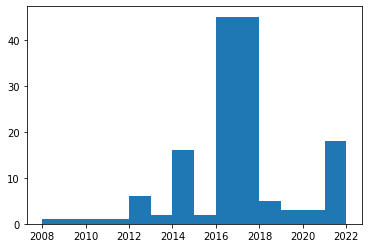

In [4]:
years = [item['disc_year'] for item in exoplanets]
print(years)
plt.hist(years, np.unique(years),)
#Bug with 2017, it does not appear but appears there are many on the hist
#plt.hist has some weird binning rules when given a list

## Graphs
The following class defines a "binary search tree" - a directed graph where each node is restricted to at most 2 edges (branches).
From any given node, the value in any node of the "left" branch are smaller, while the value of all nodes in the "right" branch are larger.  (see sample below)

You need not understand the implementation of the insert and edges methods below to complete this question.
Only that each node has a `value`, and a `left` and a `right` "branch" (an edge to a sub-tree), which is None if there is no branch.

In [5]:
class Node:
    """ One node in a Binary Tree """
    def __init__(self, value):
        """ Construct a node with the given value and no left or right branches """
        self.value = value
        self.left = None
        self.right = None

class BTree:
    """ A Binary Search Tree """
    def __init__(self, data=None):
        """ Construct binary search tree from given data or empty if no data supplied """
        self.root = None
        for item in data:
            self.insert(item)

    def insert(self, value):
        """ Insert value in the tree """
        if not self.root:
            self.root = Node(value)
        else:
            self._insert(self.root, Node(value))

    def _insert(self, parent, node):
        """ Insert given node in the tree, below parent node (non-None) """
        if node.value < parent.value:
            if parent.left is None:
                parent.left = node
            else:
                self._insert(parent.left, node)
        if node.value >= parent.value:
            if parent.right is None:
                parent.right = node
            else:
                self._insert(parent.right, node)

    def edges(self):
        """ Return list of edges (2-tuples) in this tree """
        return self._edges(self.root) if self.root else []

    def _edges(self, parent):
        """ Return list of edges (2-tuple) below parent node (non-None) """
        left_edges = [(parent.value, parent.left.value)] + self._edges(parent.left) if parent.left else []
        right_edges = [(parent.value, parent.right.value)] + self._edges(parent.right) if parent.right else []
        return left_edges + right_edges

    def draw_graph(self):
        """ Draw this tree as a directed graph """
        G = nx.DiGraph()
        G.add_edges_from(self.edges())
        nx.draw_planar(G, node_color='yellow', node_size=1000, with_labels=True)

A small binary search tree to use for testing your solution to Q.3 below...

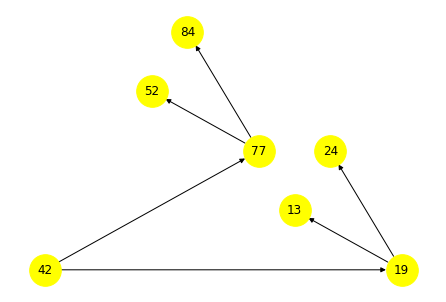

In [6]:
T = BTree( (42, 19, 77, 13, 24, 52, 84) )
T.draw_graph()

### Q.3
Write an efficient function, O(log n), to determine if a given value is in the search tree or not.
*Hint*: this is a small, pure-python algorithm - libraries like networkx or numpy won't help you here.

In [7]:
def contains(tree, search_value):
    """ Return True if tree contains the search_value, False otherwise """
    current = tree.root
    while current != None:
      if current.value == search_value:
        return True
      elif search_value < current.value:
        current = current.left
      else:
        current = current.right
    return False


      
# Unit Tests - these should pass if your algorithm works
assert contains(T, 77)
assert contains(T, 24)
assert not contains(T, 55)

## 1D Sliding Dot-product (correlation)
The array below represents the size (in sq. m) of each house along a given street.
In the questions below, we are trying to understand how each house compares to its next-door neighbours.

In [8]:
house_sizes = np.array( [251, 110, 92, 189, 215, 142, 126, 268, 243, 194] )

### Q.4
Compute the average size of each house's 2 next-door neighbours using `np.correlate` [https://numpy.org/doc/stable/reference/generated/numpy.correlate.html](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html)
To avoid edge effects, we assume the last house is next-door to first house (a cicular street)
*Hint*: try `np.pad` with `mode='wrap'`  [https://numpy.org/devdocs/reference/generated/numpy.pad.html](https://numpy.org/devdocs/reference/generated/numpy.pad.html)

In [9]:
kernal = [0.5,0,0.5]


average_size = np.correlate(np.pad(house_sizes, 1, mode='wrap'), kernal)
print(average_size)

[152.  171.5 149.5 153.5 165.5 170.5 205.  184.5 231.  247. ]


### Q.5
Compute the "variance" (difference) between each house's size and the average of it's neighbours.
*Hint*: As a check on your work, the average variance should always be zero.

In [10]:
varience = house_sizes - average_size

print(varience)
print(sum(varience)/10)

[ 99.  -61.5 -57.5  35.5  49.5 -28.5 -79.   83.5  12.  -53. ]
0.0


## Time-series plot
The simple 2D CA below simulates a very simplistic pattern of forest logging over time.
The rules are: forests grow more "mature" until the average age in a "cut block" exceeds some threshold, then the whole "cut block" is logged.
Forests re-grow at different rates on different sites, reflecting variability in site conditions.

In [11]:
MATURE = 50       # "maturity" level at which a forest is considered "mature" (e.g., old-growth)

class Logging(Cell2D):
  """ 2D Cellular Automaton that simulates simple logging in large square cut blocks  """
  kernel = np.array([[1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1],
                     [1, 1, 1, 1, 1]])

  def __init__(self, n, max_growth_rate=2, log_at=MATURE, initial_maturity=None):
    """
    n: size of forest array is n x n
    max_growth_rate: each forest cell "matures" at a rate in the range (0, max_growth_rate)
                     representing varying site conditions
    log_at:  "cut blocks" are logged when they reach this "maturity" level
    initial_maturity: a 2-tuple defining (min, max) maturity - default:(0,log_at)
                      forest is initialized with random "maturity" value in this range.
    """
    initial_maturity = initial_maturity or (0, log_at)
    self.array = np.array(np.random.randint(*initial_maturity, size=(n, n)), dtype='float64')
    self.growth_rate = np.random.random(size=(n,n)) * max_growth_rate
    self.log_at = log_at
    self.size = n*n

  def step(self):
    """Executes one time step, applying the CA rules to grow and log forest cut blocks."""
    a = self.array
    average_maturity = correlate2d(a, self.kernel, mode='same') / self.kernel.size
    loggable = average_maturity >= self.log_at
    log = correlate2d(loggable, self.kernel, mode='same')  # log entire neighbourhood around where average is loggable
    log_it = log>0
    grow_it = log==0
    self.array[log_it] = 0
    self.array[grow_it] += self.growth_rate[grow_it]

  def matured(self):
    """ Return the proportion of forest that has re-grown to at least MATURE """
    return np.sum(self.array >= MATURE) / self.size

  def draw(self):
    """Draws the cells."""
    plt.axes().set_title("Matured Forest: {}%".format(round(self.matured()*100, 2)))
    draw_array(self.array, cmap='Greens', vmin=0, vmax=MATURE)

A short animation to demonostrate the model behaviour

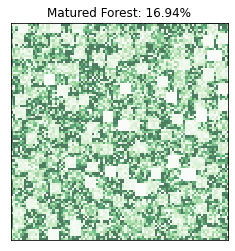

In [12]:
forest = Logging(100)
forest.draw()
forest.animate(frames=100, interval=0.1)

### Q.6
Plot the proportion of mature forest over time

Mean state: 0.16619960079840318


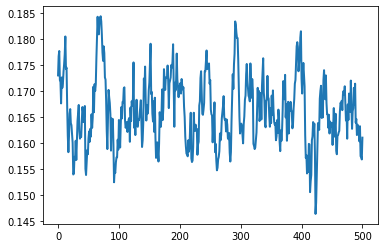

In [59]:
def mature_proportion(forest, run_length=500):
  occupied = [forest.matured()]
  for _ in range(run_length):
    forest.step()
    occupied.append(forest.matured())
  return occupied[100:] #slice off initial extreme swings in forest change

def mean(list):
  return (sum(list)/len(list))

test_forest = Logging(100)

pct_matured = mature_proportion(test_forest, 600)
plt.plot(pct_matured)

print('Mean state:', mean(pct_matured))

### Q.7
What is the system "steady state" with the model parameters used to generate the plot above?
Does the system reach a stable "equilibrium", or is it better described as dynamic / oscillating
How would you explain the shape of the plot above in terms of the model behaviour?

I would say the model enters and oscillating equilibrium of 15-18% coverage. 

It never truly reaches an unchanging state, but does not demonstrate any large 

movements away from it's equilibrium range. It oscillates between states of 

overly forested and overly logged, represented respectively as the high peaks 

and low troughs on the graph above. Regular short, sharp jumps on the 

graph showing continuous logging as patches mature

### Q.8  (bonus question)
Develop a computational experiment to show how variability in regrowth rate and/or the time-to-maturity alter the model dynamics?

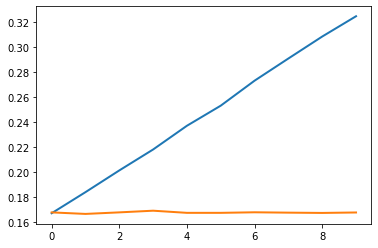

In [50]:
# Solution for Q.8 here

#Run multiple test to 500 steps with changes to regrowth and ttm, store in a list and  

def inc_regrowth_test(num_tests, pct_increase):
  """Run a number of tests where the growth rate is incremented"""
  #num_test: Number of tests to be run
  #pct_increase: Percentage increase in growth rate for each test

  rate = 2
  result = []
  for _ in range(num_tests):
    forest = Logging(100, max_growth_rate=rate)
    result.append(mean(mature_proportion(forest)))
    rate += (rate*(pct_increase/100))
  return result

def inc_time_to_regrowth_test(num_tests, pct_increase):
  """Run a number of tests where the time to regrowth is incremented"""
  #num_test: Number of tests to be run
  #pct_increase: Percentage increase in time to regrowth for each test

  time = 50
  result = []
  for _ in range(num_tests):
    forest = Logging(100, log_at=time)
    result.append(mean(mature_proportion(forest)))
    time += (time*(pct_increase/100))
  return result

plt.plot(inc_time_to_regrowth_test(10, 5), label='Varied Regrowth')
plt.plot(inc_regrowth_test(10, 5),label='varied Time to Regrowth')


